In [3]:
# Requires: pandas, sqlalchemy, matplotlib.pyplot; along with pymysql and psycopg2
import pandas as pd
from sqlalchemy import create_engine, text

In [4]:
# Database credentials
user = "root"
password = "Miz14265405!-"
host = "127.0.0.1"
port = 3306
database = "world"

sql_statement = """SELECT c.Name, count(cl.Language), count(cl.IsOfficial)
FROM country c
LEFT JOIN countrylanguage cl on cl.CountryCode = c.Code
WHERE cl.IsOfficial = 'T'
GROUP BY c.Name
HAVING count(cl.Language) > 2
ORDER BY count(cl.Language) DESC"""

try:
    engine = create_engine(  # type: ignore
        f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}?charset=utf8mb4"  # charset converst text to UTF8 standard
    )

    print(f"Connection to the {host} for user {user} created successfully.")

except Exception as e:
    print("Error: ", e)

with engine.connect() as conn:  # type: ignore
    for row in conn.execute(text(sql_statement)):  # type: ignore
        print(row)  # type: ignore

df = pd.read_sql_query(sql_statement, engine)
print(df)

Connection to the 127.0.0.1 for user root created successfully.
('Switzerland', 4, 4)
('South Africa', 4, 4)
('Belgium', 3, 3)
('Bolivia', 3, 3)
('Luxembourg', 3, 3)
('Peru', 3, 3)
('Singapore', 3, 3)
('Vanuatu', 3, 3)
           Name  count(cl.Language)  count(cl.IsOfficial)
0   Switzerland                   4                     4
1  South Africa                   4                     4
2       Belgium                   3                     3
3       Bolivia                   3                     3
4    Luxembourg                   3                     3
5          Peru                   3                     3
6     Singapore                   3                     3
7       Vanuatu                   3                     3


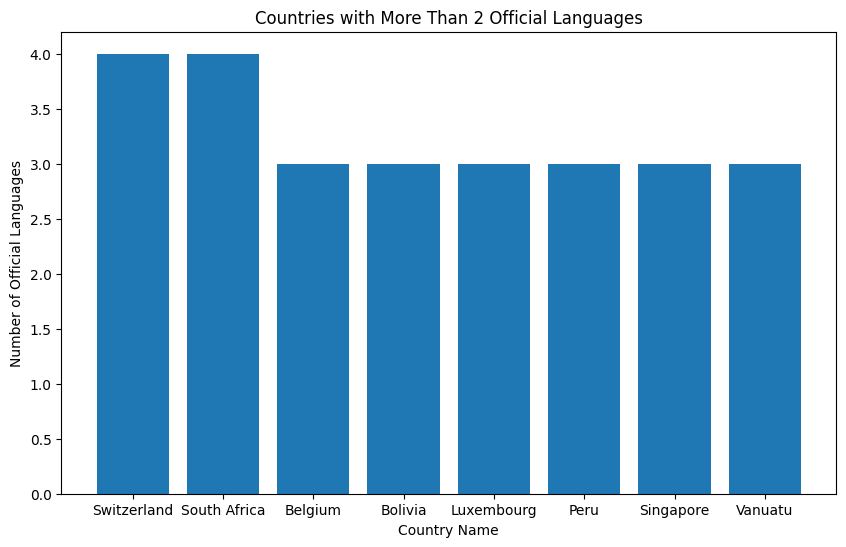

In [5]:
# Display graph of results
import matplotlib.pyplot as plt

# plot for bar graph of results
plt.figure(figsize=(10, 6))  # so that x labels aren't smooshed together
plt.bar(df['Name'], df['count(cl.Language)'])
plt.xlabel('Country Name')
plt.ylabel('Number of Official Languages')
plt.title('Countries with More Than 2 Official Languages')

plt.show()